Try to use an NN to classify patients in healthy (class 5) and non healthy (classes 1-4)

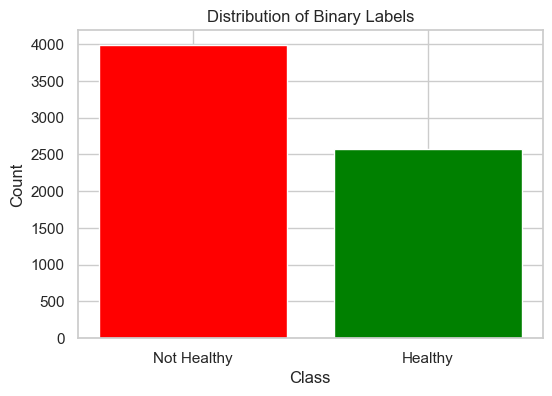

In [64]:
import numpy as np
# Load X and y
X = np.load('input_output/X_rhythm.npy')
y = np.load('input_output/y_rhythm.npy')

n_cl = 2

# create new labels y for binary classification, for each row in y, if any of the first 4 columns is 1, set new label to [1, 0] (not healthy), else set to [0, 1] (healthy)
y_binary = np.zeros((y.shape[0], n_cl))
for i in range(y.shape[0]):
    if np.any(y[i, :4] == 1):
        y_binary[i, 0] = 1
    else:
        y_binary[i, 1] = 1

# Check the distribution of the new labels
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar([0, 1], [np.sum(y_binary[:, 0]), np.sum(y_binary[:, 1])], color=['red', 'green'])
plt.xticks([0, 1], ['Not Healthy', 'Healthy'])
plt.title('Distribution of Binary Labels')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [65]:
from sklearn.utils.class_weight import compute_class_weight

# Use all possible class indices for one-hot encoded y
class_weights = compute_class_weight('balanced', classes=np.arange(y_binary.shape[1]), y=y_binary.argmax(axis=1))

# format as a dict class: weight
class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: np.float64(0.8233082706766918), 1: np.float64(1.2732558139534884)}


In [66]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y_binary, test_size=0.2, random_state=42, stratify=y_binary.argmax(axis=1))


In [67]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=4, #1              best with 1
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights,
            verbose=2)

    return history

c:\Users\adriano.minora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 275,522 (1.05 MB)

 Trainable params: 275,522 (1.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
165/165 - 9s - 55ms/step - accuracy: 0.7403 - loss: 1.2276 - val_accuracy: 0.8288 - val_loss: 1.0646
Epoch 2/1000
165/165 - 1s - 4ms/step - accuracy: 0.8647 - loss: 0.9927 - val_accuracy: 0.8531 - val_loss: 0.9933
Epoch 3/1000
165/165 - 1s - 4ms/step - accuracy: 0.8879 - loss: 0.9238 - val_accuracy: 0.8805 - val_loss: 0.9263
Epoch 4/1000
165/165 - 1s - 4ms/step - accuracy: 0.9037 - loss: 0.8811 - val_accuracy: 0.8904 - val_loss: 0.8977
Epoch 5/1000
165/165 - 1s - 5ms/step - accuracy: 0.9146 - loss: 0.8542 - val_accuracy: 0.8957 - val_loss: 0.8787
Epoch 6/1000
165/165 - 1s - 5ms/step - accuracy: 0.9210 - loss: 0.8318 - val_accuracy: 0.9102 - val_loss: 0.8549
Epoch 7/1000
165/165 - 1s - 5ms/step - accuracy: 0.9306 - loss: 0.8147 - val_accuracy: 0.9140 - val_loss: 0.8407
Epoch 8/1000
165/165 - 1s - 5ms/step - accuracy: 0.9344 - loss: 0.8010 - val_accuracy: 0.9117 - val_loss: 0.8341
Epoch 9/1000
165/165 - 1s - 5ms/step - accuracy: 0.9366 - loss: 0.7891 - val_accuracy: 0.9178 -

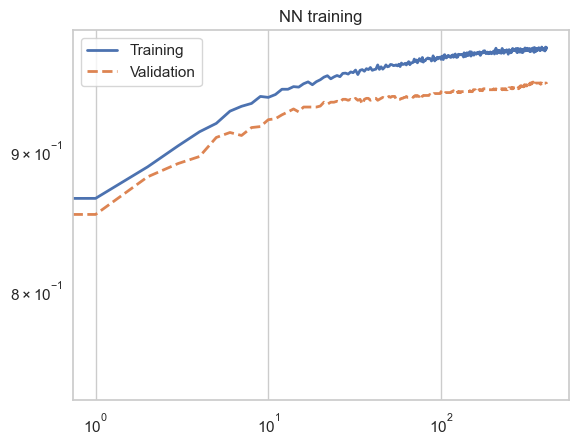

In [68]:
from tensorflow.keras import layers, regularizers

INPUTDIM = X_train.shape[1]
OUTPUTDIM = y_train.shape[1]

n_train=X_train.shape[0]
n_val=X_val.shape[0]

dropout= 0.01
reg = 0.001

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(128, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train, y_train, X_val, y_val, max_epochs=1000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()



Epoch 409/1000
165/165 - 1s - 4ms/step - accuracy: 0.9817 - loss: 0.5664 - val_accuracy: 0.9521 - val_loss: 0.6334

206/206 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 score: 0.9744215254737468


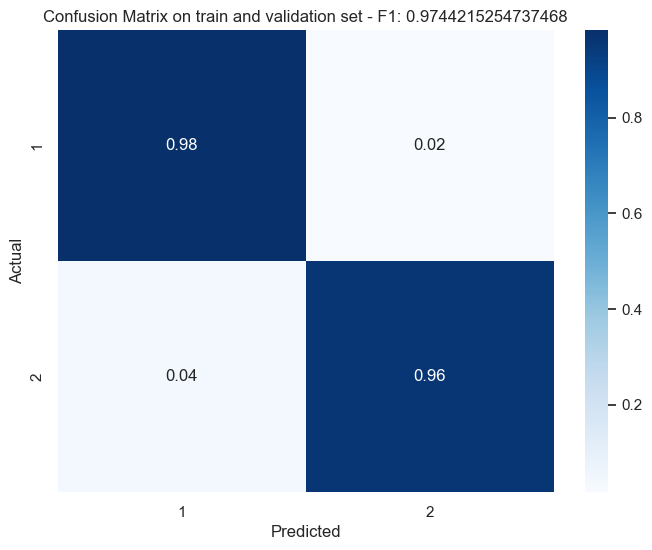

In [69]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val, y_train)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val, X_train))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on train and validation set - F1: {f1}')
plt.show()

42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 score: 0.949722655293904


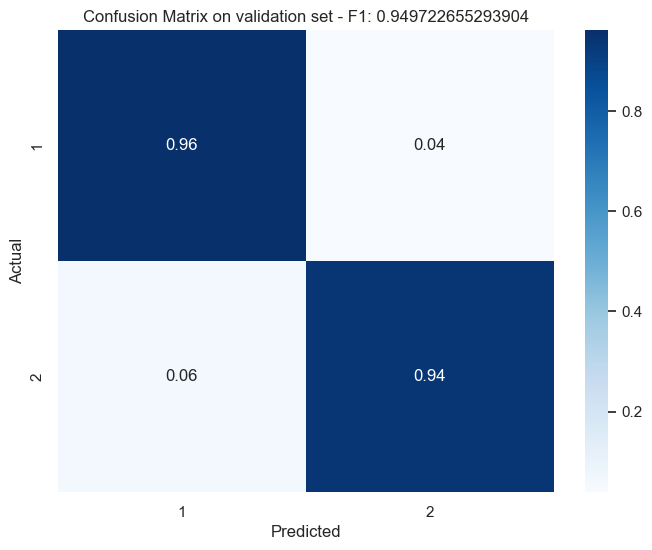

In [70]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(y_val, axis=-1)
y_pred = np.argmax(NN.predict(X_val), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on validation set - F1: {f1}')
plt.show()

In [72]:
# Save the NN

save = False
if save:
    NN.save('models/NN_rhythm_binary.keras')
    print("Model saved.")
else:
    print("Model not saved.")

Model not saved.


Now try for Male and Female separately

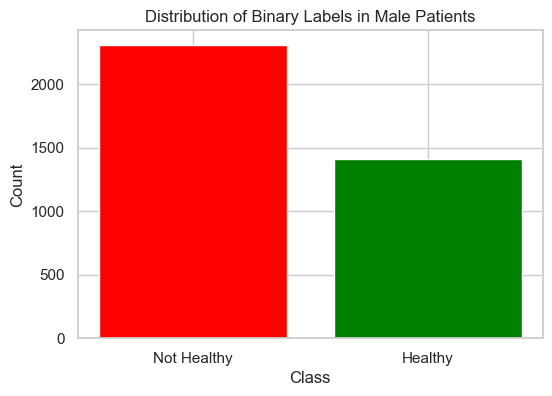

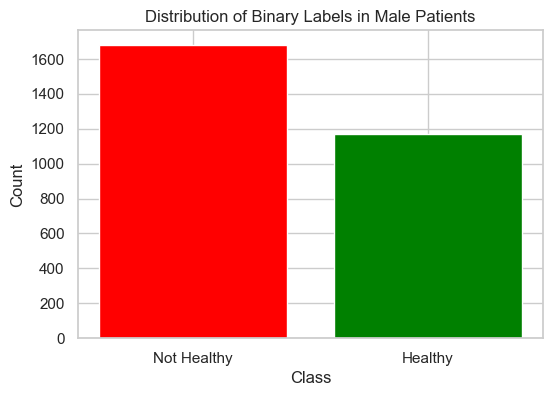

In [97]:
import numpy as np
# Load X and y
X_m = np.load('input_output/XM_rhythm.npy')
X_f = np.load('input_output/XF_rhythm.npy')
y_m = np.load('input_output/yM_rhythm.npy')
y_f = np.load('input_output/yF_rhythm.npy')

n_cl = 2

# create new labels y for binary classification, for each row in y, if any of the first 4 columns is 1, set new label to [1, 0] (not healthy), else set to [0, 1] (healthy)
y_binary_m = np.zeros((y_m.shape[0], n_cl))
y_binary_f = np.zeros((y_f.shape[0], n_cl))

for i in range(y_m.shape[0]):
    if np.any(y_m[i, :4] == 1):
        y_binary_m[i, 0] = 1
    else:
        y_binary_m[i, 1] = 1

for i in range(y_f.shape[0]):
    if np.any(y_f[i, :4] == 1):
        y_binary_f[i, 0] = 1
    else:
        y_binary_f[i, 1] = 1

# Check the distribution of the new labels
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar([0, 1], [np.sum(y_binary_m[:, 0]), np.sum(y_binary_m[:, 1])], color=['red', 'green'])
plt.xticks([0, 1], ['Not Healthy', 'Healthy'])
plt.title('Distribution of Binary Labels in Male Patients')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Check the distribution of the new labels
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.bar([0, 1], [np.sum(y_binary_f[:, 0]), np.sum(y_binary_f[:, 1])], color=['red', 'green'])
plt.xticks([0, 1], ['Not Healthy', 'Healthy'])
plt.title('Distribution of Binary Labels in Male Patients')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [98]:
from sklearn.utils.class_weight import compute_class_weight

# Use all possible class indices for one-hot encoded y
class_weights_m = compute_class_weight('balanced', classes=np.arange(y_binary_m.shape[1]), y=y_binary_m.argmax(axis=1))
class_weights_f = compute_class_weight('balanced', classes=np.arange(y_binary_f.shape[1]), y=y_binary_f.argmax(axis=1))

# format as a dict class: weight
class_weights_m = dict(enumerate(class_weights_m))
class_weights_f = dict(enumerate(class_weights_f))

print(class_weights_m)
print(class_weights_f)

{0: np.float64(0.8051948051948052), 1: np.float64(1.3191489361702127)}
{0: np.float64(0.8482142857142857), 1: np.float64(1.2179487179487178)}


In [99]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train_m, X_val_m, y_train_m, y_val_m = train_test_split(X_m, y_binary_m, test_size=0.2, random_state=42, stratify=y_binary_m.argmax(axis=1))
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_f, y_binary_f, test_size=0.2, random_state=42, stratify=y_binary_f.argmax(axis=1))



Male

In [101]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=5, #1              best with 1
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights_m,
            verbose=2)

    return history

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_98 (Dense)                │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,610 (1.21 MB)

 Trainable params: 316,610 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
93/93 - 3s - 28ms/step - accuracy: 0.7201 - loss: 2.3255 - val_accuracy: 0.8199 - val_loss: 1.9051
Epoch 2/2000
93/93 - 0s - 4ms/step - accuracy: 0.8797 - loss: 1.7557 - val_accuracy: 0.8790 - val_loss: 1.7062
Epoch 3/2000
93/93 - 0s - 4ms/step - accuracy: 0.9019 - loss: 1.6213 - val_accuracy: 0.8965 - val_loss: 1.6096
Epoch 4/2000
93/93 - 0s - 4ms/step - accuracy: 0.9194 - loss: 1.5429 - val_accuracy: 0.9073 - val_loss: 1.5498
Epoch 5/2000
93/93 - 0s - 4ms/step - accuracy: 0.9318 - loss: 1.4919 - val_accuracy: 0.9113 - val_loss: 1.5070
Epoch 6/2000
93/93 - 0s - 4ms/step - accuracy: 0.9368 - loss: 1.4550 - val_accuracy: 0.9194 - val_loss: 1.4761
Epoch 7/2000
93/93 - 0s - 4ms/step - accuracy: 0.9483 - loss: 1.4244 - val_accuracy: 0.9234 - val_loss: 1.4482
Epoch 8/2000
93/93 - 0s - 4ms/step - accuracy: 0.9516 - loss: 1.3979 - val_accuracy: 0.9234 - val_loss: 1.4286
Epoch 9/2000
93/93 - 0s - 4ms/step - accuracy: 0.9580 - loss: 1.3769 - val_accuracy: 0.9274 - val_loss: 1.4089


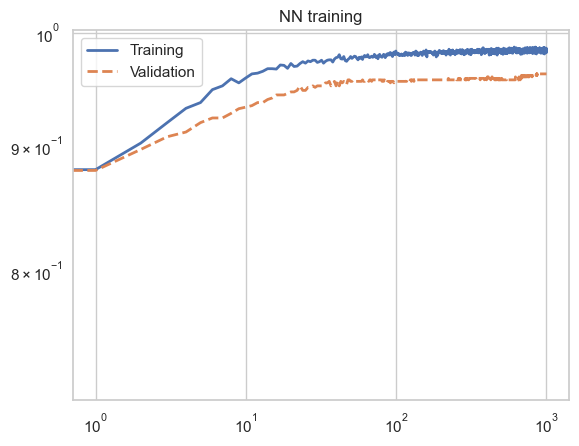

In [103]:
from tensorflow.keras import layers, regularizers

INPUTDIM = X_train_m.shape[1]
OUTPUTDIM = y_train_m.shape[1]

n_train_m=X_train_m.shape[0]
n_val_m=X_val_m.shape[0]

dropout= 0.025
reg = 0.0025

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train_m, y_train_m, X_val_m, y_val_m, max_epochs=2000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()



Epoch 639/2000
93/93 - 1s - 6ms/step - accuracy: 0.9856 - loss: 0.8349 - val_accuracy: 0.9651 - val_loss: 0.8827

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 score: 0.9814173233429544


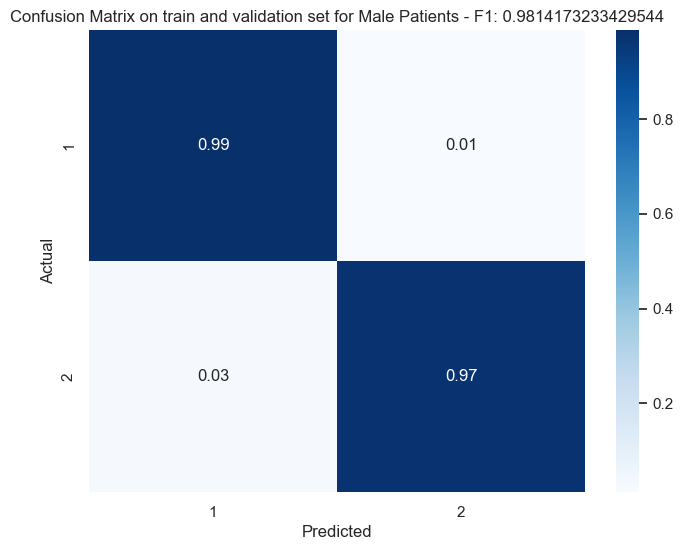

In [87]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val_m, y_train_m)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val_m, X_train_m))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on train and validation set for Male Patients - F1: {f1}')
plt.show()

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
F1 score: 0.962670207181894


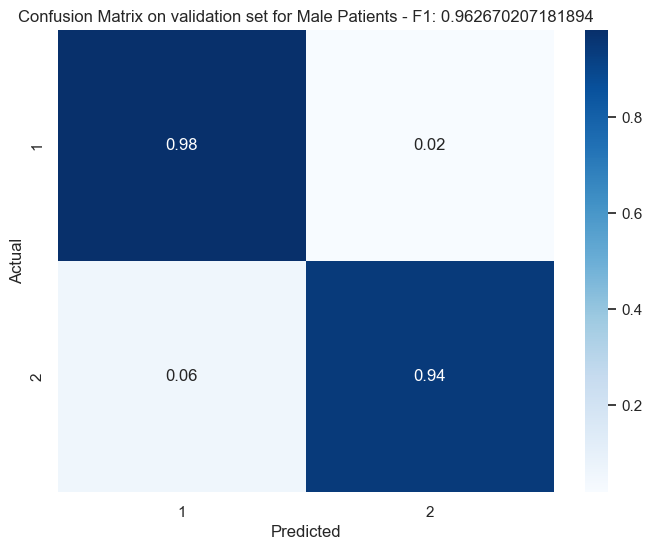

In [88]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(y_val_m, axis=-1)
y_pred = np.argmax(NN.predict(X_val_m), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on validation set for Male Patients - F1: {f1}')
plt.show()

In [90]:
# Save the NN

save = False
if save:
    NN.save('models/NN_rhythm_binary_M.keras')
    print("Model saved.")
else:
    print("Model not saved.")

Model not saved.


Female

In [91]:
import tensorflow as tf

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,    #0.05               best with 0.001
  decay_steps=50, #100        best with 100
  decay_rate=4, #1              best with 1
  staircase=True)

def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks(name):
    return [
        tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=200, min_delta=0.001),
        ]

def compile_and_fit(model, name, x_train, y_train, x_test, y_test, optimizer=None, max_epochs=100):

    if optimizer is None:
        optimizer = get_optimizer()

    model.compile(optimizer=optimizer,
                loss='binary_crossentropy',
                metrics=['accuracy'])

    model.summary()

    history = model.fit(
            x_train, y_train,
            epochs=max_epochs,
            # batch_size=500,
            validation_data=(x_test, y_test),
            callbacks=get_callbacks(name),
            class_weight=class_weights_f,
            verbose=2)

    return history

c:\Users\adriano.minora\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_88 (Dense)                │ (None, 512)            │       102,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,610 (1.21 MB)

 Trainable params: 316,610 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
72/72 - 4s - 51ms/step - accuracy: 0.8123 - loss: 1.9727 - val_accuracy: 0.9105 - val_loss: 1.5885
Epoch 2/1000
72/72 - 1s - 7ms/step - accuracy: 0.9456 - loss: 1.4616 - val_accuracy: 0.9316 - val_loss: 1.4287
Epoch 3/1000
72/72 - 1s - 7ms/step - accuracy: 0.9553 - loss: 1.3618 - val_accuracy: 0.9544 - val_loss: 1.3535
Epoch 4/1000
72/72 - 0s - 7ms/step - accuracy: 0.9675 - loss: 1.3031 - val_accuracy: 0.9561 - val_loss: 1.3083
Epoch 5/1000
72/72 - 0s - 7ms/step - accuracy: 0.9754 - loss: 1.2580 - val_accuracy: 0.9596 - val_loss: 1.2724
Epoch 6/1000
72/72 - 0s - 6ms/step - accuracy: 0.9772 - loss: 1.2286 - val_accuracy: 0.9667 - val_loss: 1.2422
Epoch 7/1000
72/72 - 0s - 6ms/step - accuracy: 0.9807 - loss: 1.2034 - val_accuracy: 0.9684 - val_loss: 1.2203
Epoch 8/1000
72/72 - 0s - 6ms/step - accuracy: 0.9807 - loss: 1.1809 - val_accuracy: 0.9702 - val_loss: 1.1997
Epoch 9/1000
72/72 - 1s - 7ms/step - accuracy: 0.9829 - loss: 1.1670 - val_accuracy: 0.9702 - val_loss: 1.1833


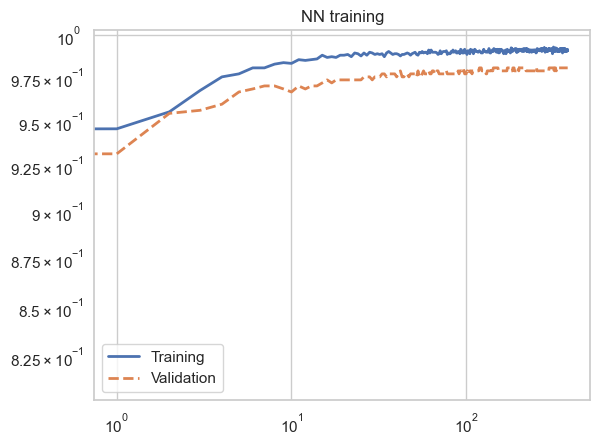

In [92]:
from tensorflow.keras import layers, regularizers

INPUTDIM = X_train_f.shape[1]
OUTPUTDIM = y_train_f.shape[1]

n_train_f=X_train_f.shape[0]
n_val_f=X_val_f.shape[0]

dropout= 0.02
reg = 0.002

NN = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(INPUTDIM,),kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(256, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(64, activation='relu', kernel_regularizer = regularizers.l2(reg)),
    layers.Dropout(dropout),
    layers.Dense(OUTPUTDIM, activation='softmax')
])

history = compile_and_fit(NN, 'NN',X_train_f, y_train_f, X_val_f, y_val_f, max_epochs=1000)

bc     = history.history['accuracy']
val_bc = history.history['val_accuracy']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2,)
plt.loglog(range(np.shape(val_bc)[0]),val_bc,'--', linewidth=2,)
plt.title('NN training')
plt.grid(True)
#plt.show(block=False)

plt.legend(('Training','Validation'))
plt.show()



Epoch 382/1000
72/72 - 0s - 6ms/step - accuracy: 0.9908 - loss: 0.6941 - val_accuracy: 0.9807 - val_loss: 0.7119

90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
F1 score: 0.9891024830534052


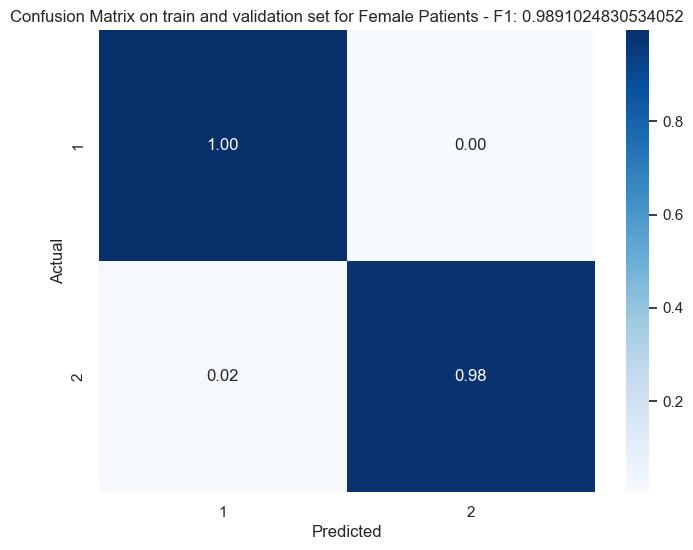

In [93]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(np.concatenate((y_val_f, y_train_f)), axis=-1)
y_pred = np.argmax(NN.predict(np.concatenate((X_val_f, X_train_f))), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on train and validation set for Female Patients - F1: {f1}')
plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
F1 score: 0.9800503355170844


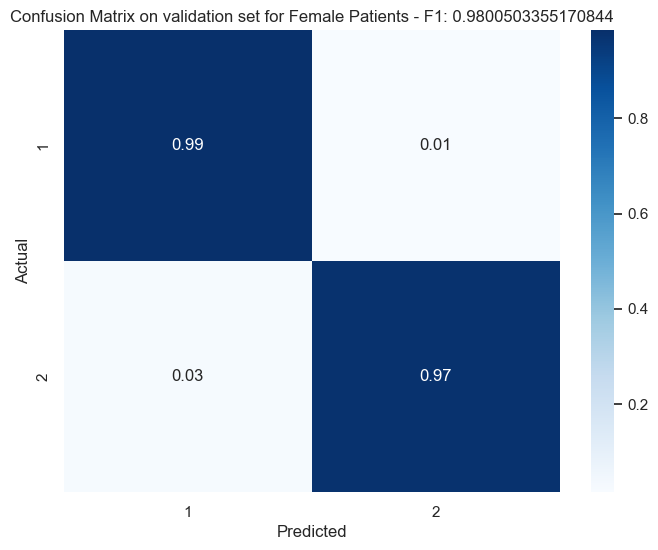

In [94]:
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns

# Example true labels and predicted labels
y_true = np.argmax(y_val_f, axis=-1)
y_pred = np.argmax(NN.predict(X_val_f), axis=-1)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average='macro')
print('F1 score:', f1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=range(n_cl), normalize='true')

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=range(1,n_cl+1), yticklabels=range(1,n_cl+1))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix on validation set for Female Patients - F1: {f1}')
plt.show()

In [96]:
# Save the NN

save = False
if save:
    NN.save('models/NN_rhythm_binary_F.keras')
    print("Model saved.")
else:
    print("Model not saved.")

Model not saved.
